Q-LEARNING: PENGUIN FISH CATCHING
DRP Project - University of Michigan

DEMO 1: SINGLE STATIONARY FISH
Demonstrating Q-Learning Fundamentals

Initializing environment and agent...
Environment: 6×6 grid
Fish: 1 STATIONARY fish
Actions: ['Up', 'Down', 'Left', 'Right']
Rewards: +10 for catching fish, -0.1 per step
Max steps: 100
State space: ~1296 states

Training agent...
(This may take 1-2 minutes...)

Episode  500/5000 | Avg Reward:   5.49 | Avg Steps:  34.3 | Success:  89.2% | ε: 0.472
Episode 1000/5000 | Avg Reward:   8.76 | Avg Steps:  12.4 | Success: 100.0% | ε: 0.223
Episode 1500/5000 | Avg Reward:   9.28 | Avg Steps:   7.2 | Success: 100.0% | ε: 0.105
Episode 2000/5000 | Avg Reward:   9.41 | Avg Steps:   5.9 | Success: 100.0% | ε: 0.050
Episode 2500/5000 | Avg Reward:   9.49 | Avg Steps:   5.1 | Success: 100.0% | ε: 0.023
Episode 3000/5000 | Avg Reward:   9.51 | Avg Steps:   4.9 | Success: 100.0% | ε: 0.011
Episode 3500/5000 | Avg Reward:   9.54 | Avg Steps:   4.7 | Success: 100.

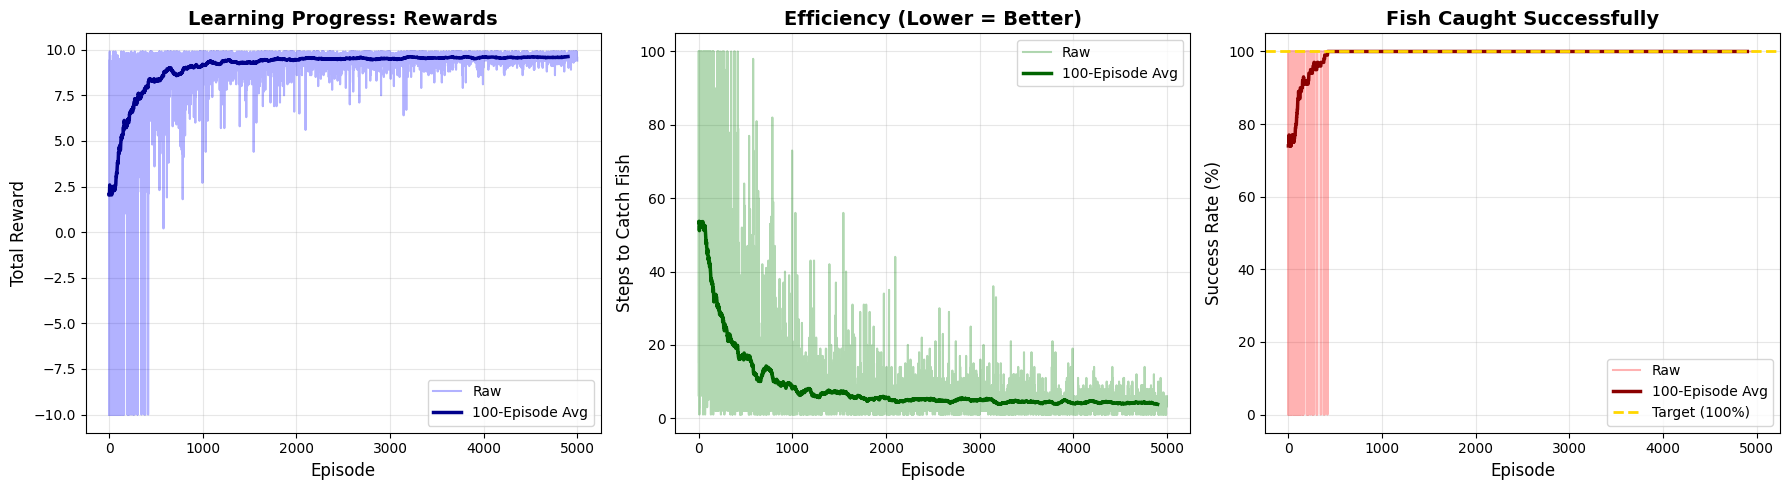


Testing trained agent (20 episodes, no exploration)...
  Test  1: SUCCESS | Reward:   9.60 | Steps:   4
  Test  2: SUCCESS | Reward:   9.80 | Steps:   2
  Test  3: SUCCESS | Reward:   9.60 | Steps:   4
  Test  4: SUCCESS | Reward:   9.60 | Steps:   4
  Test  5: SUCCESS | Reward:   9.50 | Steps:   5
  Test  6: SUCCESS | Reward:   9.40 | Steps:   6
  Test  7: SUCCESS | Reward:   9.60 | Steps:   4
  Test  8: SUCCESS | Reward:   9.60 | Steps:   4
  Test  9: SUCCESS | Reward:   9.40 | Steps:   6
  Test 10: SUCCESS | Reward:   9.60 | Steps:   4
  Test 11: SUCCESS | Reward:   9.70 | Steps:   3
  Test 12: SUCCESS | Reward:   9.70 | Steps:   3
  Test 13: SUCCESS | Reward:   9.70 | Steps:   3
  Test 14: SUCCESS | Reward:   9.60 | Steps:   4
  Test 15: SUCCESS | Reward:   9.70 | Steps:   3
  Test 16: SUCCESS | Reward:   9.60 | Steps:   4
  Test 17: SUCCESS | Reward:   9.40 | Steps:   6
  Test 18: SUCCESS | Reward:   9.20 | Steps:   8
  Test 19: SUCCESS | Reward:   9.50 | Steps:   5
  Test 20: SU

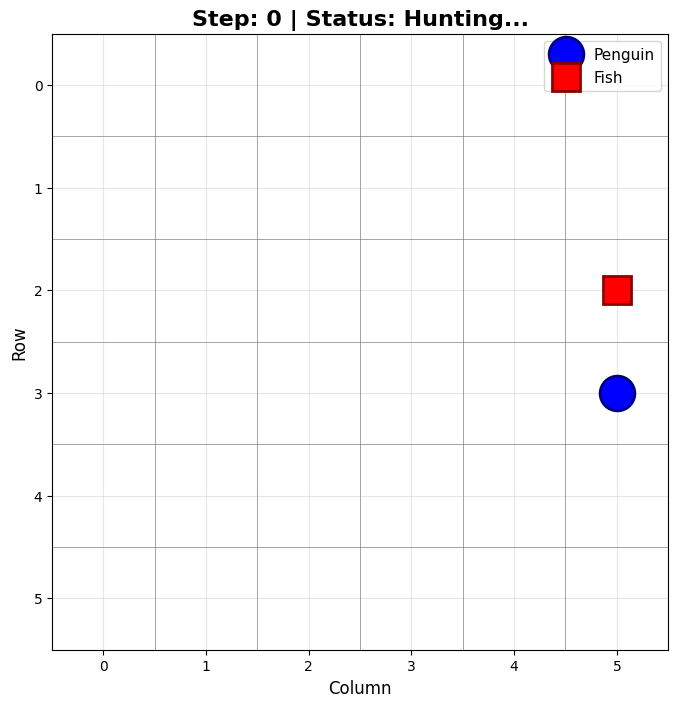


Visualization:
  Starting position: Penguin at [3, 5], Fish at [2, 5]
  Step 0: CAUGHT THE FISH! (Action: Up)
  Episode finished in 1 steps

DEMO 1 COMPLETE!
Q-learning successfully learned to catch a single stationary fish


In [ ]:
"""
Reinforcement Learning: Q-Learning for Penguin Fish Catching
DRP Project - University of Michigan Math Department

DEMO 1: SINGLE STATIONARY FISH
Simplest case to demonstrate Q-learning fundamentals
"""

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class FishCatchingEnvironment:
    """
    Environment for penguin catching a SINGLE stationary fish.

    This is the simplest version to demonstrate Q-learning:
    - Small state space (easy to learn)
    - Clear optimal policy (move directly to fish)
    - Fast convergence

    Perfect for understanding Q-learning basics!
    """

    def __init__(self, grid_size=6, max_steps=100):
        self.grid_size = grid_size
        self.max_steps = max_steps
        self.reset()

        # Actions: 0=up, 1=down, 2=left, 3=right
        self.actions = [0, 1, 2, 3]
        self.action_names = ['Up', 'Down', 'Left', 'Right']

    def reset(self):
        """Reset environment to initial state"""
        # Place penguin at random position
        self.penguin_pos = [np.random.randint(0, self.grid_size),
                           np.random.randint(0, self.grid_size)]

        # Place ONE fish at random position (different from penguin)
        while True:
            self.fish_pos = [np.random.randint(0, self.grid_size),
                           np.random.randint(0, self.grid_size)]
            if self.fish_pos != self.penguin_pos:
                break

        self.current_step = 0
        self.fish_caught = False
        return self.get_state()

    def get_state(self):
        """
        Return current state as a tuple.
        State = (penguin_row, penguin_col, fish_row, fish_col) if fish not caught
        State = (penguin_row, penguin_col, -1, -1) if fish caught
        """
        if self.fish_caught:
            return tuple(self.penguin_pos) + (-1, -1)
        else:
            return tuple(self.penguin_pos) + tuple(self.fish_pos)

    def move_penguin(self, action):
        """Move penguin based on action within grid bounds"""
        new_pos = self.penguin_pos.copy()

        if action == 0:  # Up
            new_pos[0] = max(0, self.penguin_pos[0] - 1)
        elif action == 1:  # Down
            new_pos[0] = min(self.grid_size - 1, self.penguin_pos[0] + 1)
        elif action == 2:  # Left
            new_pos[1] = max(0, self.penguin_pos[1] - 1)
        elif action == 3:  # Right
            new_pos[1] = min(self.grid_size - 1, self.penguin_pos[1] + 1)

        return new_pos

    def step(self, action):
        """
        Execute one time step.
        Returns (new_state, reward, done)
        """
        # Move penguin
        self.penguin_pos = self.move_penguin(action)

        # Small step penalty to encourage efficiency
        reward = -0.1

        # Check if penguin caught the fish
        if not self.fish_caught and self.penguin_pos == self.fish_pos:
            reward += 10  # Big reward for catching fish! Net: +9.9
            self.fish_caught = True

        self.current_step += 1

        # Episode ends when fish is caught or max steps reached
        done = self.fish_caught or (self.current_step >= self.max_steps)

        return self.get_state(), reward, done

    def render(self, ax=None):
        """Visualize the current state"""
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 8))

        ax.clear()
        ax.set_xlim(-0.5, self.grid_size - 0.5)
        ax.set_ylim(-0.5, self.grid_size - 0.5)
        ax.set_aspect('equal')

        # Draw grid
        for i in range(self.grid_size + 1):
            ax.axhline(i - 0.5, color='gray', linewidth=0.5)
            ax.axvline(i - 0.5, color='gray', linewidth=0.5)

        # Draw penguin (blue circle)
        ax.plot(self.penguin_pos[1], self.penguin_pos[0], 'bo',
                markersize=25, label='Penguin', markeredgecolor='navy', markeredgewidth=2)

        # Draw fish (red square) if not caught
        if not self.fish_caught:
            ax.plot(self.fish_pos[1], self.fish_pos[0], 'rs',
                    markersize=20, label='Fish', markeredgecolor='darkred', markeredgewidth=2)

        status = "CAUGHT!" if self.fish_caught else "Hunting..."
        ax.set_title(f'Step: {self.current_step} | Status: {status}',
                     fontsize=16, fontweight='bold')
        ax.set_xlabel('Column', fontsize=12)
        ax.set_ylabel('Row', fontsize=12)
        ax.invert_yaxis()  # Invert y-axis so (0,0) is top-left
        ax.legend(loc='upper right', fontsize=11)
        ax.grid(True, alpha=0.3)

        return ax


class QLearningAgent:
    """Q-Learning agent"""

    def __init__(self, actions, learning_rate=0.1, discount_factor=0.95,
                 epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.actions = actions
        self.learning_rate = learning_rate  # Alpha
        self.discount_factor = discount_factor  # Gamma
        self.epsilon = epsilon  # Exploration rate
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min

        # Q-table: dictionary with state as key, array of Q-values as value
        self.q_table = defaultdict(lambda: np.zeros(len(actions)))

    def get_action(self, state, training=True):
        """Epsilon-greedy action selection"""
        if training and np.random.random() < self.epsilon:
            return np.random.choice(self.actions)
        else:
            return np.argmax(self.q_table[state])

    def update(self, state, action, reward, next_state, done):
        """Q-learning update rule"""
        current_q = self.q_table[state][action]

        if done:
            target_q = reward
        else:
            max_next_q = np.max(self.q_table[next_state])
            target_q = reward + self.discount_factor * max_next_q

        # Update Q-value
        self.q_table[state][action] = current_q + self.learning_rate * (target_q - current_q)

    def decay_epsilon(self):
        """Decay exploration rate"""
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)


def train_agent(env, agent, num_episodes=500, verbose_every=50):
    """Train the Q-learning agent"""
    episode_rewards = []
    episode_steps = []
    episode_success = []

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.get_action(state, training=True)
            next_state, reward, done = env.step(action)
            agent.update(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward

        agent.decay_epsilon()

        episode_rewards.append(total_reward)
        episode_steps.append(env.current_step)
        episode_success.append(1 if env.fish_caught else 0)

        if (episode + 1) % verbose_every == 0:
            avg_reward = np.mean(episode_rewards[-verbose_every:])
            avg_steps = np.mean(episode_steps[-verbose_every:])
            success_rate = 100 * np.mean(episode_success[-verbose_every:])
            print(f"Episode {episode + 1:4d}/{num_episodes} | "
                  f"Avg Reward: {avg_reward:6.2f} | "
                  f"Avg Steps: {avg_steps:5.1f} | "
                  f"Success: {success_rate:5.1f}% | "
                  f"ε: {agent.epsilon:.3f}")

    return episode_rewards, episode_steps, episode_success


def plot_training_results(episode_rewards, episode_steps, episode_success):
    """Plot training statistics"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    window = 100

    # Smooth curves
    if len(episode_rewards) >= window:
        smoothed_rewards = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
        smoothed_steps = np.convolve(episode_steps, np.ones(window)/window, mode='valid')
        smoothed_success = np.convolve(episode_success, np.ones(window)/window, mode='valid') * 100
    else:
        smoothed_rewards = episode_rewards
        smoothed_steps = episode_steps
        smoothed_success = [100*x for x in episode_success]

    # Plot 1: Rewards
    axes[0].plot(episode_rewards, alpha=0.3, color='blue', label='Raw')
    axes[0].plot(smoothed_rewards, linewidth=2.5, color='darkblue', label=f'{window}-Episode Avg')
    axes[0].set_xlabel('Episode', fontsize=12)
    axes[0].set_ylabel('Total Reward', fontsize=12)
    axes[0].set_title('Learning Progress: Rewards', fontsize=14, fontweight='bold')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Plot 2: Steps
    axes[1].plot(episode_steps, alpha=0.3, color='green', label='Raw')
    axes[1].plot(smoothed_steps, linewidth=2.5, color='darkgreen', label=f'{window}-Episode Avg')
    axes[1].set_xlabel('Episode', fontsize=12)
    axes[1].set_ylabel('Steps to Catch Fish', fontsize=12)
    axes[1].set_title('Efficiency (Lower = Better)', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # Plot 3: Success Rate
    axes[2].plot([100*x for x in episode_success], alpha=0.3, color='red', label='Raw')
    axes[2].plot(smoothed_success, linewidth=2.5, color='darkred', label=f'{window}-Episode Avg')
    axes[2].axhline(y=100, color='gold', linestyle='--', linewidth=2, label='Target (100%)')
    axes[2].set_xlabel('Episode', fontsize=12)
    axes[2].set_ylabel('Success Rate (%)', fontsize=12)
    axes[2].set_title('Fish Caught Successfully', fontsize=14, fontweight='bold')
    axes[2].set_ylim(-5, 105)
    axes[2].legend()
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    print("=" * 70)
    print("Q-LEARNING: PENGUIN FISH CATCHING")
    print("DRP Project - University of Michigan")
    print()
    print("DEMO 1: SINGLE STATIONARY FISH")
    print("Demonstrating Q-Learning Fundamentals")
    print("=" * 70)
    print()

    # Initialize
    print("Initializing environment and agent...")
    env = FishCatchingEnvironment(grid_size=6, max_steps=100)
    agent = QLearningAgent(
        actions=env.actions,
        learning_rate=0.1,
        discount_factor=0.95,
        epsilon=1.0,
        epsilon_decay=0.9985,  # Slower decay for longer training
        epsilon_min=0.01
    )

    print(f"Environment: {env.grid_size}×{env.grid_size} grid")
    print(f"Fish: 1 STATIONARY fish")
    print(f"Actions: {env.action_names}")
    print(f"Rewards: +10 for catching fish, -0.1 per step")
    print(f"Max steps: {env.max_steps}")
    print(f"State space: ~{env.grid_size * env.grid_size * env.grid_size * env.grid_size} states")
    print()

    # Train
    print("Training agent...")
    print("(This may take 1-2 minutes...)")
    print()
    num_episodes = 5000
    episode_rewards, episode_steps, episode_success = train_agent(
        env, agent, num_episodes=num_episodes, verbose_every=500
    )

    print()
    print("=" * 70)
    print("TRAINING COMPLETE!")
    print("=" * 70)
    print(f"Total episodes: {num_episodes}")
    print(f"Final epsilon: {agent.epsilon:.3f}")
    print(f"Q-table size: {len(agent.q_table)} states learned")
    print()

    # Analyze final performance
    final_100 = min(100, len(episode_rewards))
    final_rewards = episode_rewards[-final_100:]
    final_steps = episode_steps[-final_100:]
    final_success = episode_success[-final_100:]

    print(f"FINAL {final_100} EPISODES:")
    print(f"  Average reward: {np.mean(final_rewards):.2f}")
    print(f"  Average steps: {np.mean(final_steps):.1f}")
    print(f"  Success rate: {100 * np.mean(final_success):.1f}%")
    print()

    # Plot
    print("Plotting training results...")
    plot_training_results(episode_rewards, episode_steps, episode_success)

    # Test
    print()
    print("Testing trained agent (20 episodes, no exploration)...")
    test_episodes = 20
    test_rewards = []
    test_steps = []
    test_success = []

    for i in range(test_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = agent.get_action(state, training=False)
            next_state, reward, done = env.step(action)
            total_reward += reward
            state = next_state

        test_rewards.append(total_reward)
        test_steps.append(env.current_step)
        test_success.append(1 if env.fish_caught else 0)

        status = "SUCCESS" if env.fish_caught else "FAILED"
        print(f"  Test {i+1:2d}: {status:7s} | Reward: {total_reward:6.2f} | Steps: {env.current_step:3d}")

    print()
    print("TEST RESULTS:")
    print(f"  Average reward: {np.mean(test_rewards):.2f}")
    print(f"  Average steps: {np.mean(test_steps):.1f}")
    print(f"  Success rate: {100 * np.mean(test_success):.1f}%")
    print()

    # Visualize
    print("Visualizing one test episode...")
    state = env.reset()
    done = False

    fig, ax = plt.subplots(figsize=(8, 8))

    env.render(ax)
    plt.pause(0.5)

    print("\nVisualization:")
    print(f"  Starting position: Penguin at {env.penguin_pos}, Fish at {env.fish_pos}")

    step = 0
    while not done:
        action = agent.get_action(state, training=False)
        next_state, reward, done = env.step(action)

        env.render(ax)
        plt.pause(0.3)

        if reward > 0:
            print(f"  Step {step}: CAUGHT THE FISH! (Action: {env.action_names[action]})")

        state = next_state
        step += 1

    print(f"  Episode finished in {env.current_step} steps")
    plt.show()

    print()
    print("=" * 70)
    print("DEMO 1 COMPLETE!")
    print("Q-learning successfully learned to catch a single stationary fish")
    print("=" * 70)